In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime


def printTime(tag):
    print(tag + ':', datetime.datetime.now())
    print('')

printTime('処理開始')

print('Inputファイルを表示')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


処理開始: 2020-01-09 23:49:39.889404

Inputファイルを表示
/kaggle/input/.DS_Store
/kaggle/input/test.csv
/kaggle/input/data_description.txt
/kaggle/input/train.csv


#### 学習データの読み込み

In [2]:
train = pd.read_csv('/kaggle/input/train.csv')
test = pd.read_csv('/kaggle/input/test.csv')

# 学習データを特徴量と目的変数に分ける
train_x = train.drop(['SalePrice'], axis=1)
train_y = train['SalePrice']

# テストデータは特徴量のみなので、そのままでよい
test_x = test.copy()


#### 学習データの分析

In [3]:
# SalePriceの平均や標準偏差、最大値、最小値、最頻値などの要約統計量を表示
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

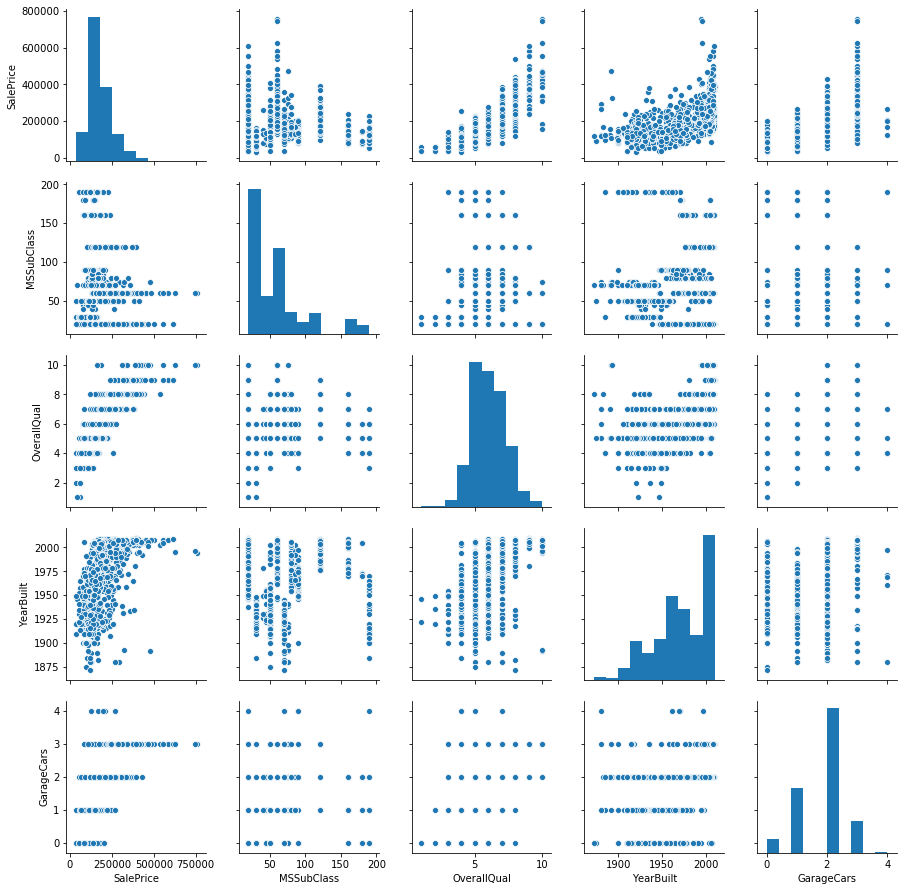

In [4]:
# 多変数間の分布を可視化
sns.pairplot(train.loc[:,['SalePrice','MSSubClass','OverallQual', 'YearBuilt','GarageCars']])

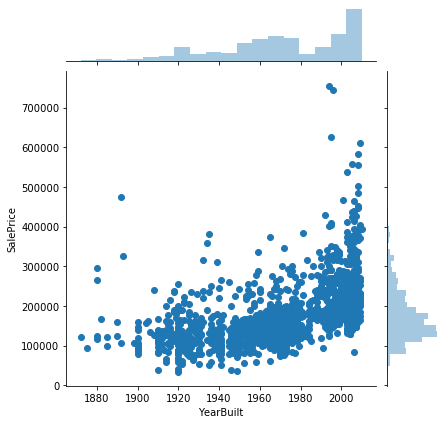

In [5]:
# YearBuiltとSalePriceの散布図を表示
sns.jointplot(train['YearBuilt'], train['SalePrice'])

 #### 特徴量作成

In [6]:
from sklearn.preprocessing import LabelEncoder

# 解析対象とする列を設定
targets = ['MSSubClass','OverallQual', 'YearBuilt','GarageCars']

# 解析対象列のみを抽出
train_x = train_x.loc[:,targets]
test_x = test_x.loc[:,targets]


#### モデル作成

In [7]:
from xgboost import XGBClassifier

# モデルの作成および学習データを与えての学習
model = XGBClassifier(n_estimators=20, random_state=71)
model.fit(train_x, train_y)

# テストデータの予測値を出力する
pred = model.predict(test_x)

# 提出用ファイルの作成
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': pred})
submission.to_csv('/kaggle/output/submission_first.csv', index=False)

printTime('処理終了')

処理終了: 2020-01-09 23:50:03.503799

